In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submid = pd.read_csv('sample_submission.csv')

In [4]:
""" train = train.sample(frac=0.025, random_state=np.random.seed(12))
train """

' train = train.sample(frac=0.025, random_state=np.random.seed(12))\ntrain '

In [5]:
target = train['Cover_Type']
print(target.unique())

[1 2 3 6 7 4 5]


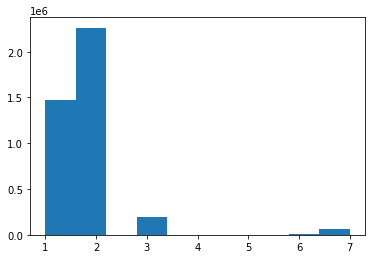

In [6]:
train_new = train.drop(columns=['Id', 'Cover_Type'])
target = train['Cover_Type']
train_new.head()
plt.hist(target)
plt.show()

In [7]:
train_new.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,...,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000
mean,2980.192,151.586,15.098,271.315,51.663,1766.642,211.838,221.061,140.811,1581.407,...,0.027,0.037,0.038,0.012,0.016,0.011,0.012,0.041,0.039,0.032
std,289.048,109.961,8.547,226.550,68.216,1315.610,30.760,22.231,43.699,1127.616,...,0.164,0.190,0.191,0.109,0.126,0.103,0.110,0.198,0.194,0.175
min,1773.000,-33.000,-3.000,-92.000,-317.000,-287.000,-4.000,49.000,-53.000,-277.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2760.000,60.000,9.000,110.000,4.000,822.000,198.000,210.000,115.000,781.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2966.000,123.000,14.000,213.000,31.000,1436.000,218.000,224.000,142.000,1361.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,3217.000,247.000,20.000,361.000,78.000,2365.000,233.000,237.000,169.000,2084.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,4383.000,407.000,64.000,1602.000,647.000,7666.000,301.000,279.000,272.000,8075.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


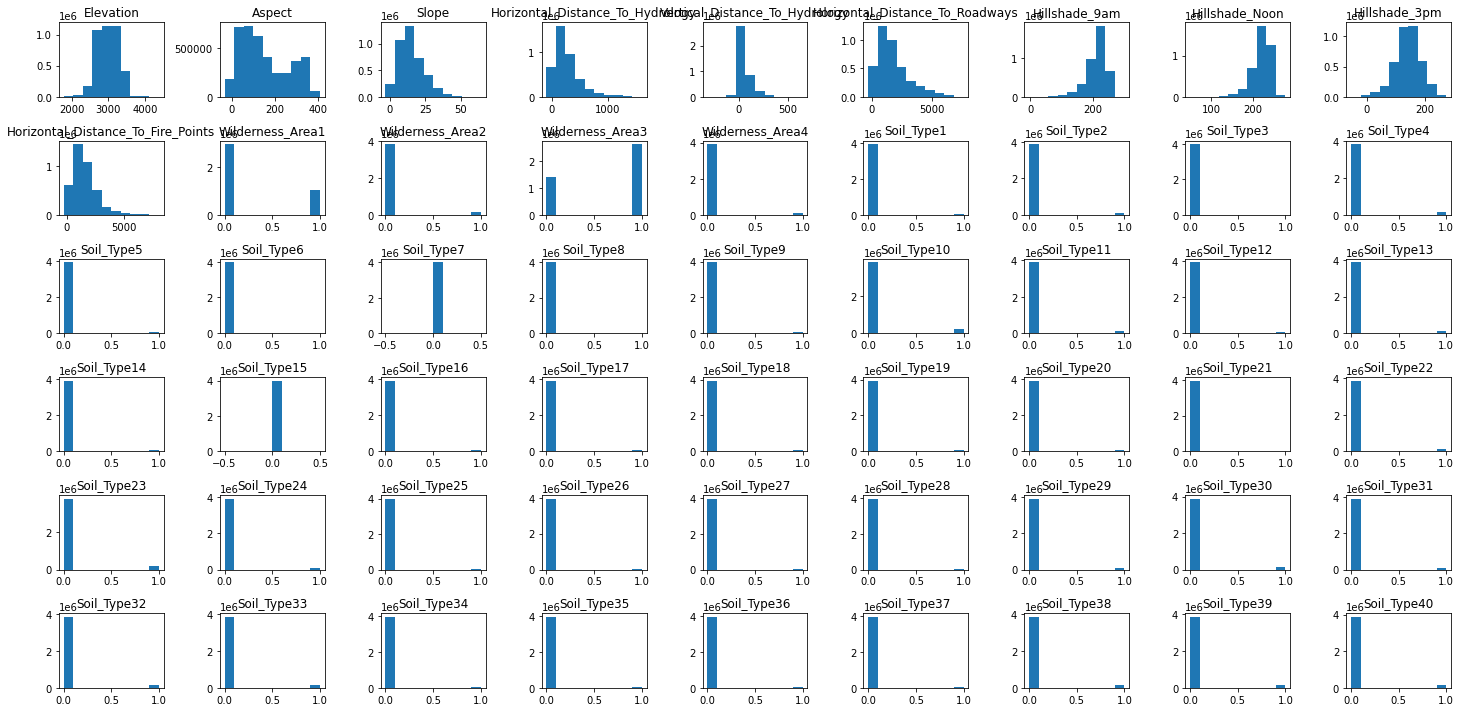

In [8]:
fig, ax = plt.subplots(6, 9, figsize=(20, 10))
for i, column in enumerate(train_new.columns):
    ax[i // 9, i % 9].hist(train[column])
    ax[i // 9, i % 9].set_title(column)

plt.tight_layout()
plt.show()



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

from sklearn.model_selection import cross_val_score

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_new, target, random_state=42, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200000, 54)
(800000, 54)
(3200000,)
(800000,)


In [21]:

# Train the machine learning techniques
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier()
model_3 = GradientBoostingClassifier()
model_4 = MLPClassifier()
models = [model_1,model_2,model_3,model_4]

for m in tqdm(models):
    m.fit(X_train, y_train)
    break

print("train is done")

# Make predictions on the testing set
y_preds = []
for p in tqdm(models):
    y_preds.append(p.predict_proba(X_test))
    break
print("predict is done")

  0%|          | 0/4 [02:03<?, ?it/s]


train is done


  0%|          | 0/4 [00:00<?, ?it/s]

predict is done


[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
[0. 0. 0. 0. 0. 0. 0.]


ValueError: 1 is not in list

In [ ]:
# Calculate the AUC scores
aucs=[]
for p in tqdm(predictions):
    auc = roc_auc_score(y_test.values, p, multi_class='ovo')
    print(auc)
    aucs.append(auc)

    break
print("calcutate auc is done")

""" # Ensemble the predictions
predictions_ensemble = (predictions_1 + predictions_2 + predictions_3 + predictions_4) / 4

# Calculate the AUC score for the ensemble
auc_ensemble = roc_auc_score(y_test, predictions_ensemble) """

# Compare the AUC scores
for (m,a) in tqdm(zip(models,aucs)):
    print("AUC for", m,":", a)
    break

  0%|          | 0/1 [00:00<?, ?it/s]


ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'